In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#Reading Indian Consumer Behaviour as a Dataframe
df = pd.read_csv('Indian automoble buying behavour study 1.0.csv')

### Exploring Data:

In [3]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


In [4]:
print(df.shape)

(99, 13)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [6]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [7]:
#Analyzing unique values of the columns with string value
for col in ['Profession','Marrital Status','Education','Personal loan','House Loan','Wife Working','Make']:
    print(col,':-',df[col].unique())

Profession :- ['Salaried' 'Business']
Marrital Status :- ['Single' 'Married']
Education :- ['Post Graduate' 'Graduate']
Personal loan :- ['Yes' 'No']
House Loan :- ['No' 'Yes']
Wife Working :- ['No' 'Yes' 'm']
Make :- ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


### From the above cell we get to know about the unique values of each features 

In [8]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

### From the above cell we can conclude that there are 0 null values in the whole dataset

### Performing Data Cleaning:

In [9]:
df.head(15)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,City,1200000
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,Baleno,700000
8,34,Business,Married,Post Graduate,4,No,No,No,2000000,0,2000000,Verna,1100000
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,1200000,700000,1900000,i20,800000


### In the above dataframe we can notice that row no. 11 th value of Wife Working column is 'm' but the corresponding 'Wife Salary' is 0. Therefore we can safely replace 'm' with 'No'

In [10]:
df['Wife Working'] = df['Wife Working'].replace(['m'],'No')

In [11]:
df.head(15)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,City,1200000
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,Baleno,700000
8,34,Business,Married,Post Graduate,4,No,No,No,2000000,0,2000000,Verna,1100000
9,34,Salaried,Married,Graduate,3,Yes,Yes,Yes,1200000,700000,1900000,i20,800000


## Performing Behavioral and Psychographic Analysis

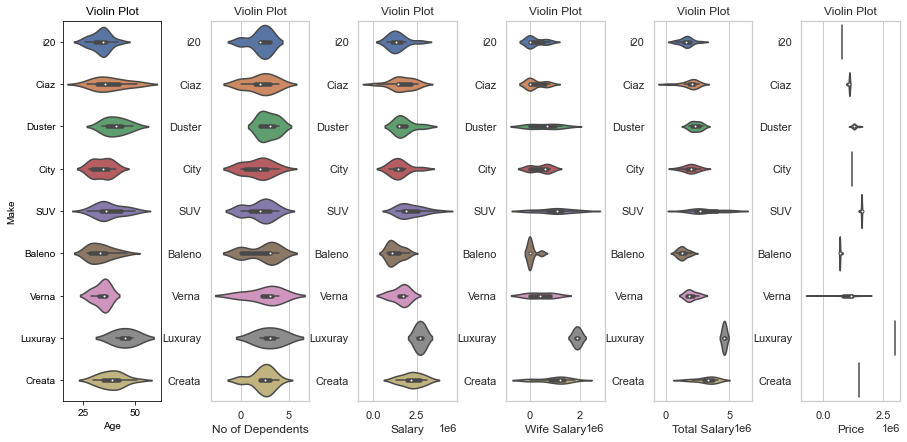

In [12]:
plt.figure(1, figsize=(15,7))
n = 0
for cols in ['Age', 'No of Dependents','Salary', 'Wife Salary', 'Total Salary', 'Price']:
    n += 1
    plt.subplot(1,6,n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace=1, wspace=0.5)
    sns.violinplot(x= cols, y = 'Make', data=df)
    plt.ylabel("Make" if n==1 else'')
    plt.title('Violin Plot')

### From the above figure we can conclude that:
#### 1. Consumers with less age purchase less expensive cars
#### 2. Consumers with greater No. of Dependents buys vehicle like SUVs which has more seats
#### 3. Salary plot matches with the Price plot

### 1. Relation between consumers age and the vehicle they tend to purchase

##### Make of vehicles they tend to purchase

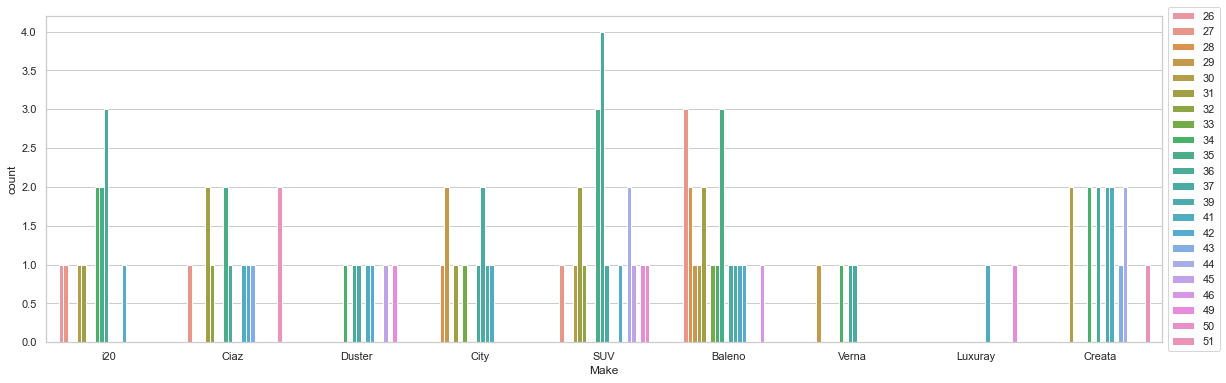

In [13]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Age")
plt.legend (loc='center left', bbox_to_anchor=(1, 0.5))

##### Price of vehicle owned

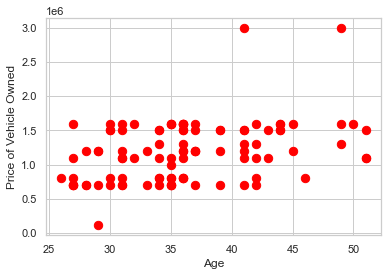

In [14]:
plt.xlabel('Age')
plt.ylabel('Price of Vehicle Owned')
plt.scatter(df['Age'],df['Price'], color="red", s=70)

### 2: Relation between consumers total salary and the vehicle they tend to purchase

##### Make of vehicles they tend to purchase

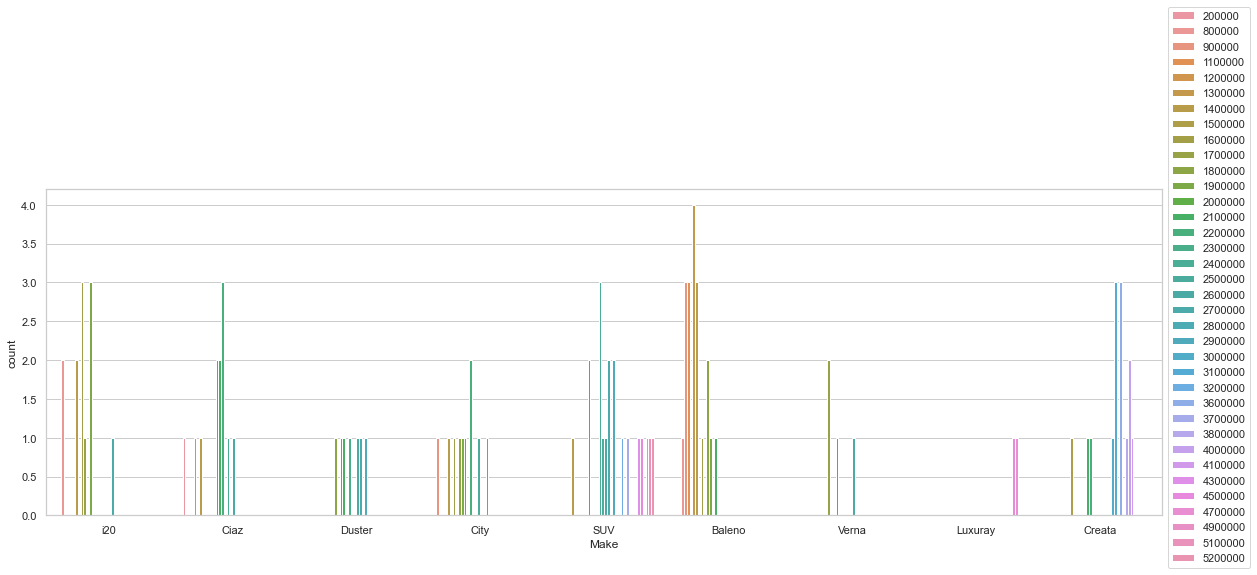

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Total Salary")
plt.legend (loc='center left', bbox_to_anchor=(1, 0.7))

##### Price of vehicle owned

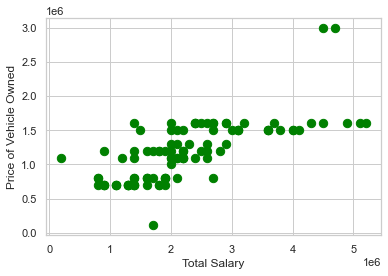

In [16]:
plt.xlabel('Total Salary')
plt.ylabel('Price of Vehicle Owned')
plt.scatter(df[ 'Total Salary'],df['Price'], color="green", s=70)

### 3: Relation between number of dependents on a consumer and the vehicles they tend to purchase

##### Make of vehicles they tend to purchase

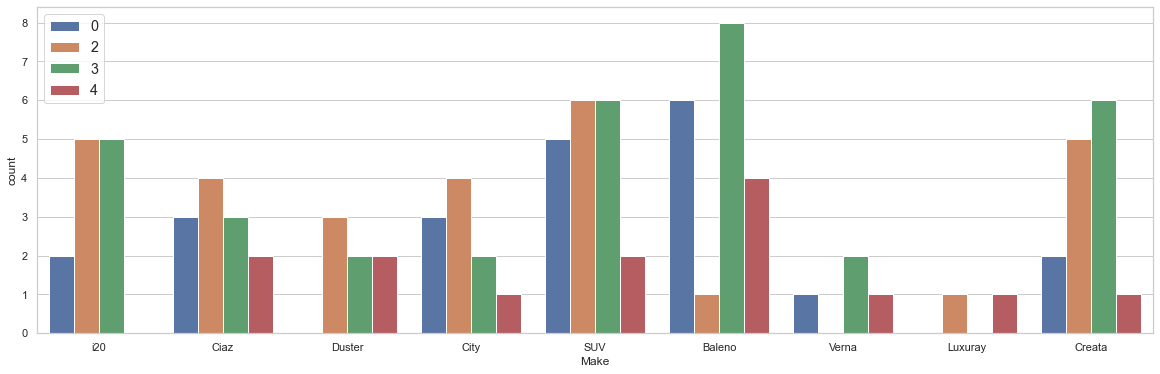

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="No of Dependents")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(fontsize="large")

##### Price of Vehicle Owned

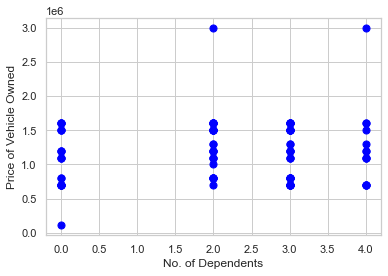

In [18]:
plt.xlabel('No. of Dependents')
plt.ylabel('Price of Vehicle Owned')
plt.scatter(df['No of Dependents'],df['Price'], color="blue", s=50)

### 4. Relation between consumers marital status and the vehicles they tend to purchase

##### Make of vehicles they tend to purchase

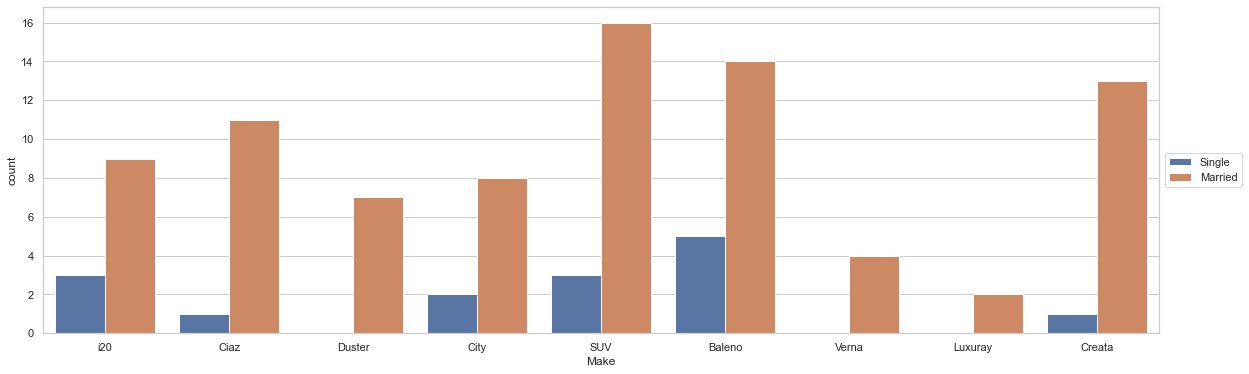

In [19]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Marrital Status")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


##### Price of Vehicle Owned

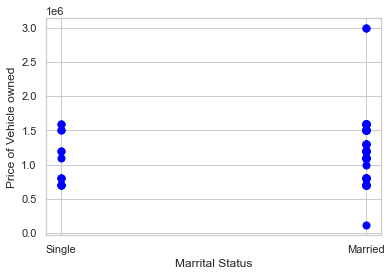

In [20]:
plt.xlabel('Marrital Status')
plt.ylabel('Price of Vehicle owned')
plt.scatter(df['Marrital Status'],df['Price'], color="blue", s=50)

### 5: Relation between consumers profession and the vehicles they tend to purchase

##### Make of vehicles they tend to purchase

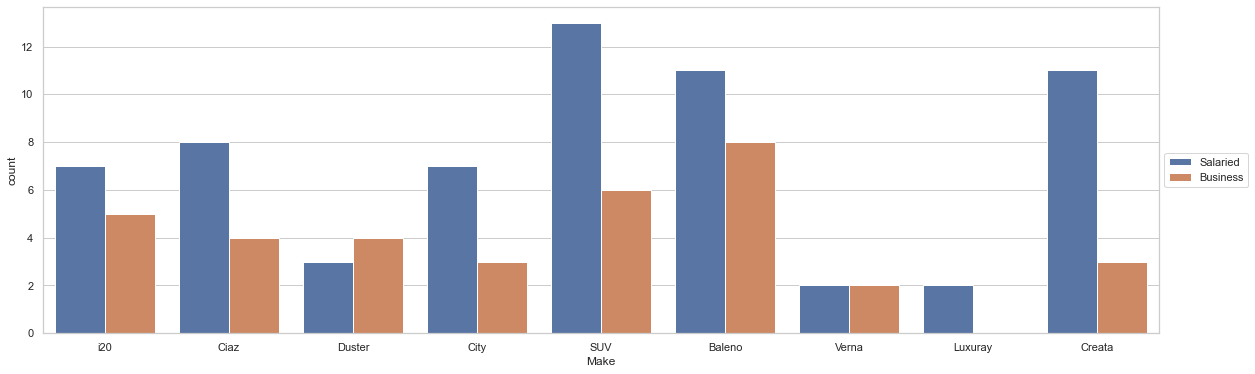

In [21]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Profession")
plt.legend (loc='center left', bbox_to_anchor=(1, 0.5))

##### Price of Vehicle Owned

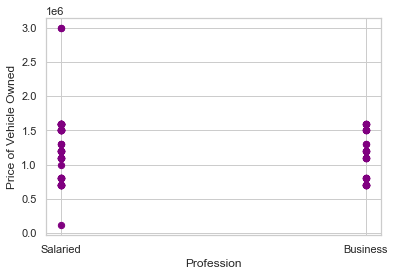

In [22]:
plt.xlabel('Profession')
plt.ylabel('Price of Vehicle Owned')
plt. scatter(df['Profession'], df['Price'], color="purple", s=40)

### 6: Relation between consumers education and the vehicles they tend to purchase

##### Make of vehicles they tend to purchase

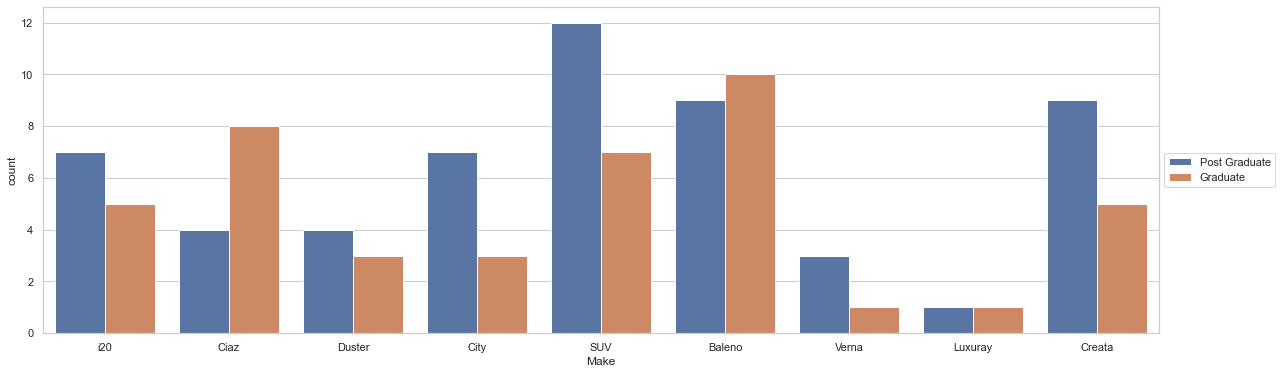

In [23]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Education")
plt.legend (loc='center left', bbox_to_anchor=(1, 0.5))

##### Price of Vehicle Owned

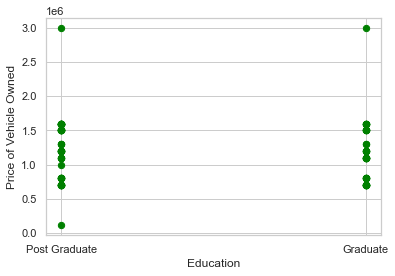

In [24]:
plt.xlabel('Education')
plt.ylabel('Price of Vehicle Owned')
plt.scatter(df['Education'], df['Price'], color="green", s=40)

### 7: Relation between consumers loan status and the vehicles they tend to purchase

##### Make of vehicles they tend to purchase (Based on personal loan)

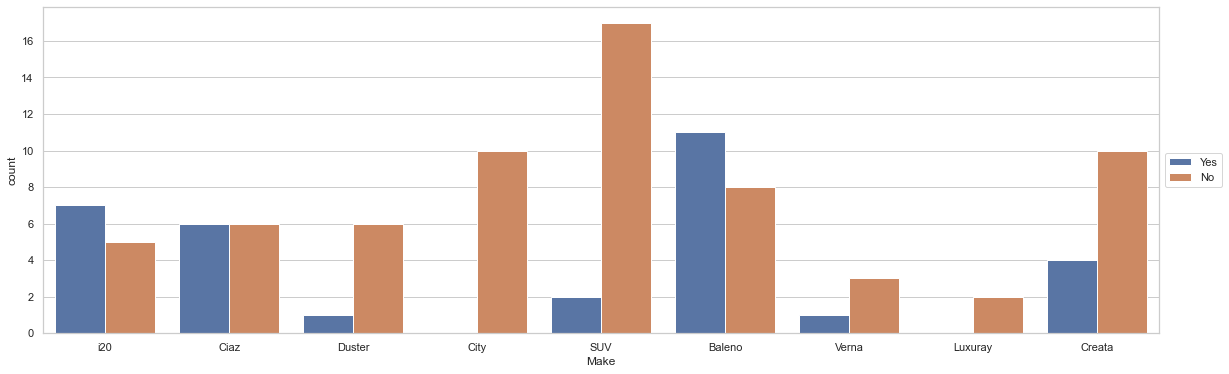

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Personal loan")
plt.legend (loc='center left', bbox_to_anchor=(1, 0.5))

##### Price of Vehicle Owned (Based on personal loan)

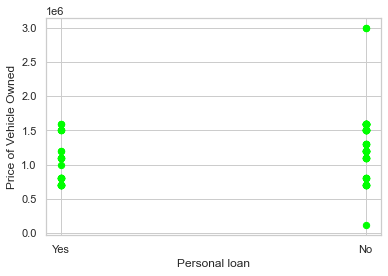

In [26]:
plt.xlabel('Personal loan')
plt.ylabel('Price of Vehicle Owned')
plt. scatter(df['Personal loan'],df['Price'], color="lime", s=40)

##### Make of vehicles they tend to purchase (Based on house loan)

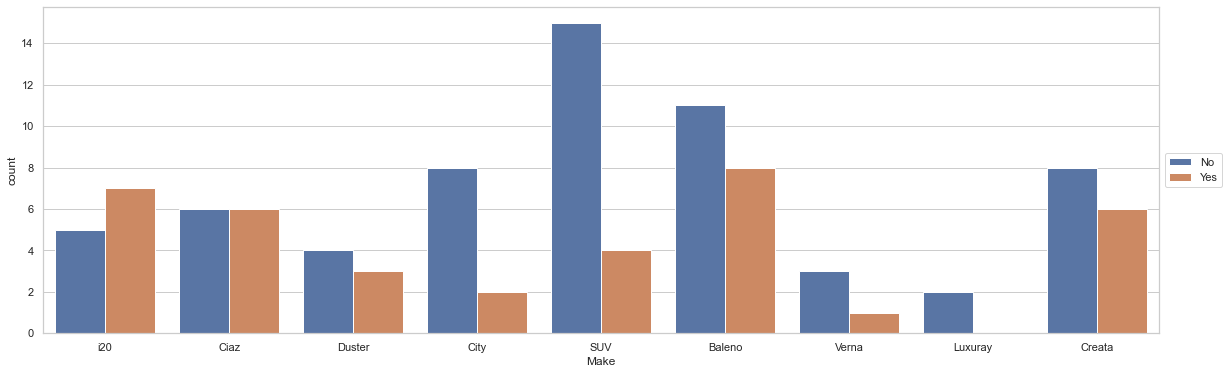

In [27]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="House Loan")
plt.legend (loc='center left', bbox_to_anchor=(1, 0.5))

##### Price of Vehicle Owned (Based on house loan)

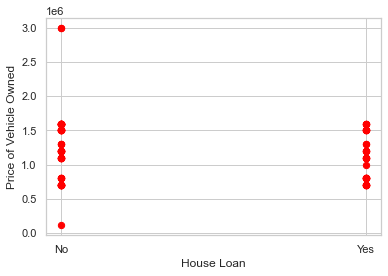

In [28]:
plt.xlabel('House Loan')
plt.ylabel('Price of Vehicle Owned')
plt.scatter(df[ 'House Loan'],df['Price'], color="red", s=40) 

## Performing Demographic Analysis

In [29]:
# Dropping Noise Data Columns
New_IndianAutomobileStudy = df.drop(['Profession', 'Marrital Status' ,'Education'  ,'Personal loan'  ,'House Loan'  ,'Wife Working', 'Make'], axis=1)

In [30]:
New_IndianAutomobileStudy

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
0,27,0,800000,0,800000,800000
1,35,2,1400000,600000,2000000,1000000
2,45,4,1800000,0,1800000,1200000
3,41,3,1600000,600000,2200000,1200000
4,31,2,1800000,800000,2600000,1600000
...,...,...,...,...,...,...
94,27,0,2400000,0,2400000,1600000
95,50,3,3800000,1300000,5100000,1600000
96,51,2,2200000,0,2200000,1100000
97,51,2,2700000,1300000,4000000,1500000


c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

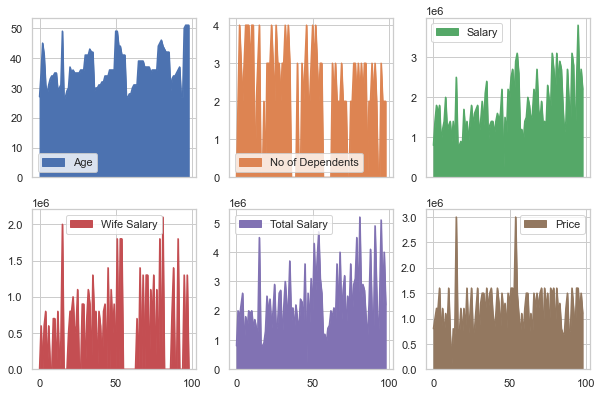

In [31]:
New_IndianAutomobileStudy.plot(kind="area", subplots=True, layout=(3,3), figsize=(10,10))

#### Observations:

##### 1. People between the ages of 25 and 50 make up the largest consumer market.
##### 2. Most people with an average gross salary of around 30 lakhs buy vehicles.
##### 3. Most of the people spend around 10 to 20 lakh rupees for vehicles.

<AxesSubplot:>

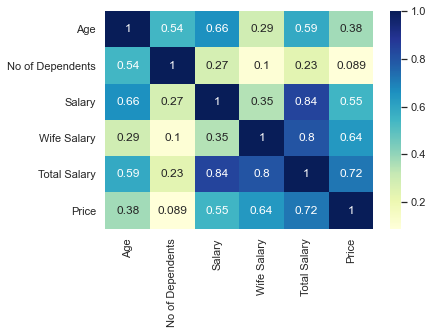

In [32]:
# Heatmap of Correlation
sns.heatmap(New_IndianAutomobileStudy.corr(), annot=True, cmap="YlGnBu")

c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


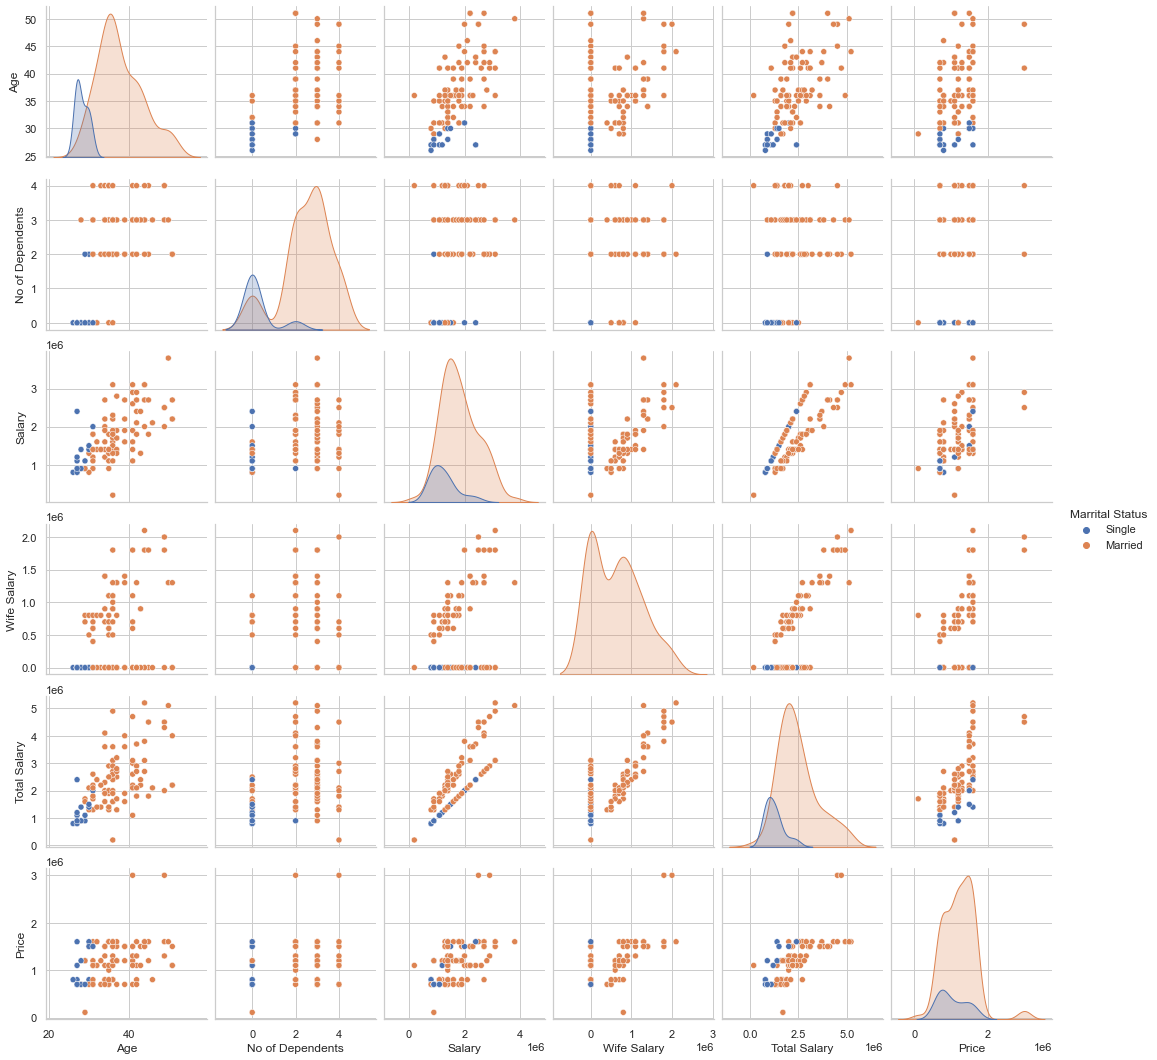

In [33]:
# Pair Plot Using Marital Status to Filter Data
sns.pairplot(df, kind='scatter', hue='Marrital Status')

## Performing Geographic Analysis

In [34]:
EvStats = pd.read_csv("Electric Vehicle Sales Report.csv")
EvStats

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82
5,6,Himachal Pradesh,0,0,0,0,0,98,0,98
6,7,Jammu & Kashmir,2,76,152,0,0,208,0,438
7,8,Goa,0,0,0,0,0,513,1,514
8,9,Dadra and Nagar Haveli,4,0,9,0,0,803,0,816
9,10,Jharkhand,75,228,736,9,7,655,0,1710


In [35]:
# Dropping Unwanted Columns
EvStats.drop(['Sl. No'], axis=1)

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,Meghalaya,0,0,0,0,0,6,0,6
1,Nagaland,0,20,3,0,0,1,0,24
2,Manipur,16,8,11,0,5,12,0,52
3,Tripura,28,9,36,0,0,8,0,81
4,Andaman & Nicobar islands,0,0,0,0,0,82,0,82
5,Himachal Pradesh,0,0,0,0,0,98,0,98
6,Jammu & Kashmir,2,76,152,0,0,208,0,438
7,Goa,0,0,0,0,0,513,1,514
8,Dadra and Nagar Haveli,4,0,9,0,0,803,0,816
9,Jharkhand,75,228,736,9,7,655,0,1710


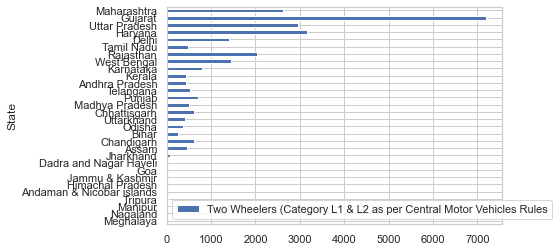

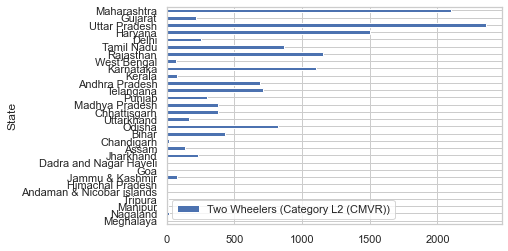

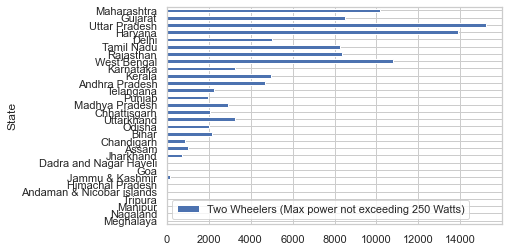

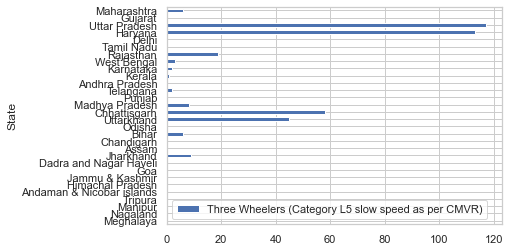

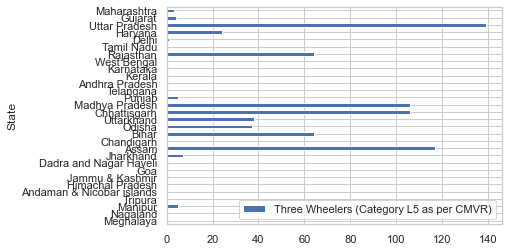

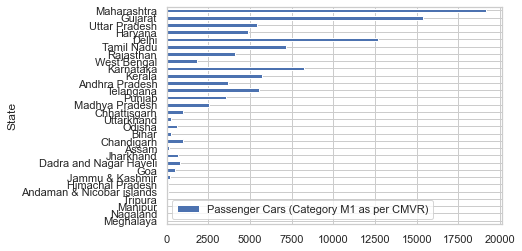

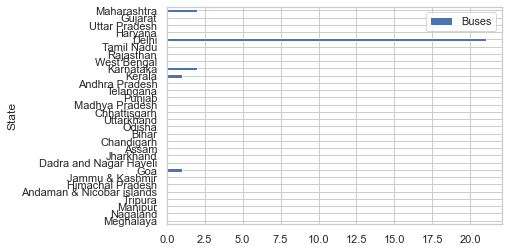

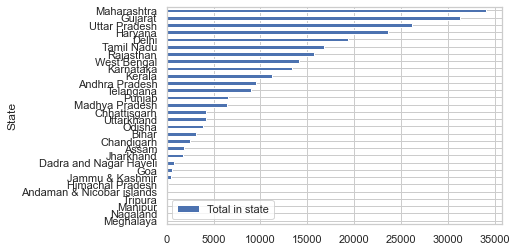

In [36]:
# States for each category of Electric Vehicles
x = EvStats['State']
y = EvStats[['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules','Two Wheelers (Category L2 (CMVR))',
            'Two Wheelers (Max power not exceeding 250 Watts)', 'Three Wheelers (Category L5 slow speed as per CMVR)',
            'Three Wheelers (Category L5 as per CMVR)','Passenger Cars (Category M1 as per CMVR)',
            'Buses', 'Total in state']]
for y in y:
  ax = EvStats.plot.barh(x='State', y=y)

#### Observation:
##### To increase the sales of electric vehicles we should target the states with high number of electric vehicles because people in these states tend to buy them.

## K-Means Clustering:

In [37]:
# Remove 'Make' column

X = df.iloc[:,df.columns!='Make']
X.head(8)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,1600000
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,700000
6,31,Salaried,Married,Graduate,4,No,No,Yes,1200000,600000,1800000,1200000
7,33,Business,Married,Post Graduate,4,No,No,No,1400000,0,1400000,700000


In [38]:
# Encoding for categorical variables

encod = {"Profession":{"Salaried":0,"Business":1},
        "Education": {"Graduate":0,"Post Graduate":1},
        "Personal loan":{"No":0,"Yes":1},
        "Marrital Status":{"Single":0,"Married":1},
        "House Loan":{"No":0,"Yes":1},
        "Wife Working":{"No":0,"Yes":1}
        }

In [39]:
new_df = X.replace(encod)
new_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,0,0,1,0,1,0,0,800000,0,800000,800000
1,35,0,1,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,1,1,0,4,1,1,0,1800000,0,1800000,1200000
3,41,1,1,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,0,1,1,2,1,0,1,1800000,800000,2600000,1600000


In [40]:
# Standardization

X_scale = StandardScaler().fit_transform(new_df)

# Add name of columns

X_scale = pd.DataFrame(X_scale,columns = ['Age','Profession','Marrital Status','Education','No of Dependents',
        'Personal loan', 'House Loan','Wife Working','Salary','Wife Salary','Total Salary','Price'])

# Convert back into numpy
x_new = X_scale.to_numpy()
X_scale


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,-1.498630,-0.739510,-2.366432,0.876275,-1.642313,1.446980,-0.772512,-1.051847,-1.397118,-0.887055,-1.406760,-0.904843
1,-0.211304,-0.739510,0.422577,0.876275,-0.136859,1.446980,1.294479,0.950708,-0.501877,0.108995,-0.258937,-0.445579
2,1.397855,1.352247,0.422577,-1.141195,1.368594,1.446980,1.294479,-1.051847,0.094950,-0.887055,-0.450240,0.013685
3,0.754191,1.352247,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,-0.203464,0.108995,-0.067633,0.013685
4,-0.854967,-0.739510,0.422577,0.876275,-0.136859,1.446980,-0.772512,0.950708,0.094950,0.441012,0.314975,0.932213
...,...,...,...,...,...,...,...,...,...,...,...,...
94,-1.498630,1.352247,-2.366432,-1.141195,-1.642313,-0.691095,-0.772512,-1.051847,0.990190,-0.887055,0.123671,0.932213
95,2.202434,-0.739510,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,3.079085,1.271054,2.706274,0.932213
96,2.363350,1.352247,0.422577,-1.141195,-0.136859,1.446980,1.294479,-1.051847,0.691777,-0.887055,-0.067633,-0.215947
97,2.363350,-0.739510,0.422577,0.876275,-0.136859,-0.691095,-0.772512,0.950708,1.437811,1.271054,1.654102,0.702581


In [41]:
# Check for best no. of clusters

inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',
    max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(X_scale)
    inertia.append(kmeans.inertia_)

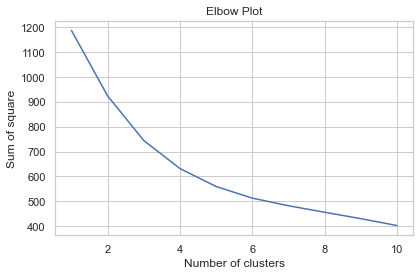

In [42]:
plt.plot(range(1,11),inertia)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of square')
plt.tight_layout()
plt.show()

In [43]:
# From the above graph, 2 clusters can be considered 3 clusters and 5 cluster, as both shows sudden change in slope.

# Kmeans for 3 clusters

kmeans = KMeans(n_clusters=3,init = 'k-means++',
    max_iter = 300, n_init = 10, random_state=42)

kmeans.fit(X_scale)



KMeans(n_clusters=3, random_state=42)

In [44]:
y = kmeans.predict(X_scale)
y_col = pd.DataFrame(y,columns = ['Class'])


In [45]:
Data = pd.concat([df,y_col],axis =1)
Data

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Class
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,2
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,2
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,1
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,0
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,1
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,2
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,1


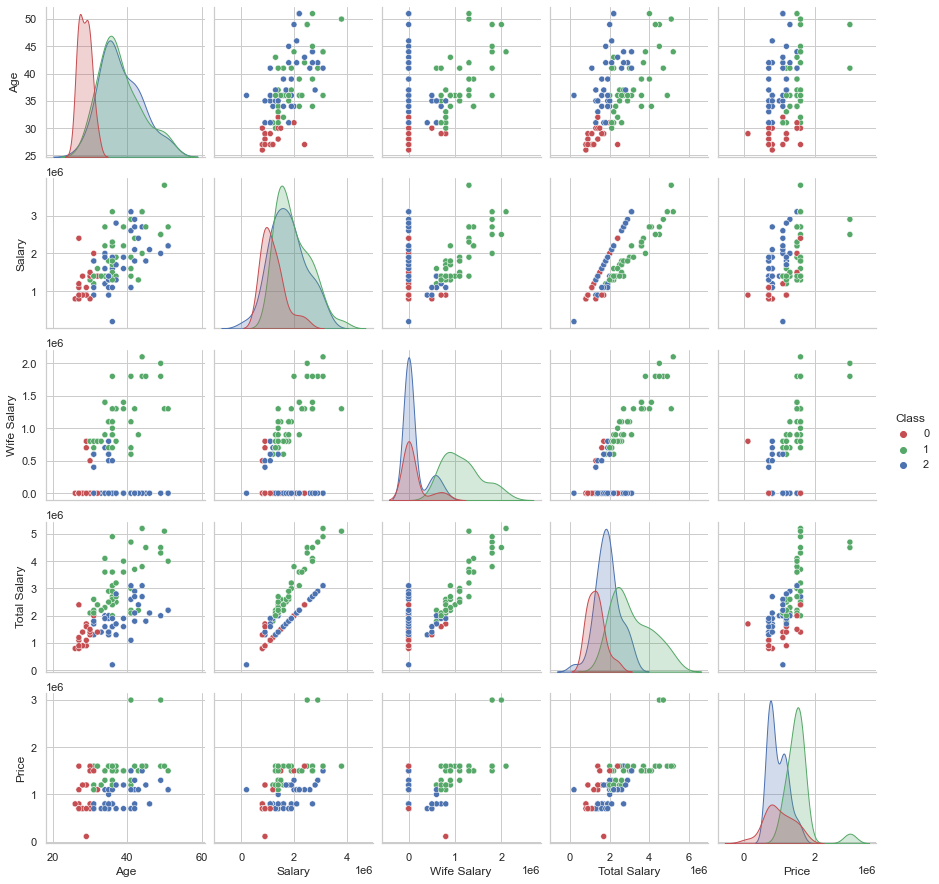

In [46]:
# Pair plot

sns.pairplot(Data,x_vars=['Age','Salary','Wife Salary','Total Salary','Price'],y_vars = ['Age','Salary','Wife Salary','Total Salary','Price'],hue = 'Class',palette=['r','g','b'])

In [47]:
# Simarly for 5 Clusters Kmeans 

kmeans1 = KMeans(n_clusters=5,init = 'k-means++',
    max_iter = 300, n_init = 10, random_state=42)

kmeans1.fit(X_scale)

KMeans(n_clusters=5, random_state=42)

In [48]:
y1 = kmeans1.predict(X_scale)
y_col1 = pd.DataFrame(y1,columns = ['Class'])


In [49]:
Data1 = pd.concat([df,y_col1],axis =1)
Data1

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Class
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,1
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,4
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,4
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,0
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,1
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,3
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,4
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,3


c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


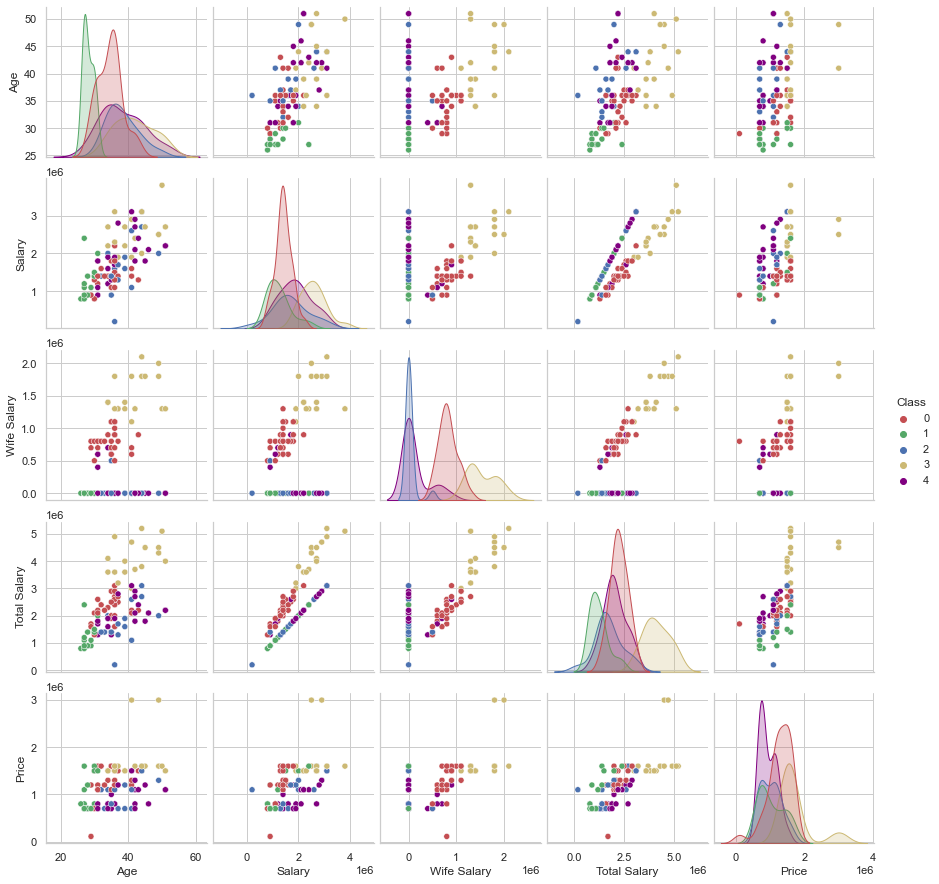

In [50]:
# Pair plot

from turtle import color


sns.pairplot(Data1,x_vars=['Age','Salary','Wife Salary','Total Salary','Price'],y_vars = ['Age','Salary','Wife Salary','Total Salary','Price'],hue = 'Class',palette=['r','g','b','y','purple'])